In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
os.chdir('C://Users//m190114//Documents//Projeto - Churn//PILOTO') #Setting work directory

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes) 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

In [4]:
#Lista contendo as variáveis explicativas selecionadas
Var_treino = ['VR_RENDA', 'TED_VL_TOTAL', 'Saldo_Medio_RENDAFI', 'TEMPO_MOV', 'Saldo_Medio_CDB', 'QTD_CONTAS', 
       'MIN_CONTA', 'MEDIANA_m4', 'MEDIANA_m1', 'Resgate_RENDAFI','FOLHA_VL_total', 'SOMA_REST', 'MEDIANA_m3', 
       'VL_TOTAL_REST', 'Resgate_CDB', 'VL_MIN_REST', 'CD_CATEGORIA_PROFISSIONAL', 'Saldo_Medio_HIPERFUN', 'CD_ESTADO_CIVIL',
       'ANOS_COM_RESTRITIVO', 'MEDIANA_m2', 'Saldo_Medio_ACOES', 'TED_Q_m4_T', 'Saldo_Medio_MULTIMER', 'Saldo_Medio_OUTROS']

In [5]:
#Lista contendo as variáveis explicativas selecionadas
Var_teste = ['VR_RENDA', 'TED_VL_TOTAL', 'Saldo_Medio_RENDA_FI', 'TEMPO_MOV', 'Saldo_Medio_CDB', 'QTD_CONTAS', 
       'MIN_CONTA', 'MEDIANA_m4', 'MEDIANA_m1', 'Resgate_RENDA_FI','FOLHA_VL_total', 'SOMA_REST', 'MEDIANA_m3', 
       'VL_TOTAL_REST', 'Resgate_CDB', 'VL_MIN_REST', 'CD_CATEGORIA_PROFISSIONAL', 'Saldo_Medio_HIPERFUN', 'CD_ESTADO_CIVIL',
       'ANOS_COM_RESTRITIVO', 'MEDIANA_m2', 'Saldo_Medio_ACOES', 'TED_Q_m4_T', 'Saldo_Medio_MULTIMER', 'Saldo_Medio_OUTROS']

In [6]:
#Leitura da base antiga (utilizada para treinar o modelo)
df0 = pd.read_csv('TES1.csv', sep = ';', encoding = 'latin-1')
df0.fillna(value =-1 , inplace=True)
df0.head()

CPF_MASC15  churn  TED_VL_m1  TED_VL_m2  TED_VL_m3  TED_VL_m4  \
0  0B71B5160109249   True        0.0        0.0        0.0        0.0   
1  F8D0F2319C5DB82  False        0.0        0.0        0.0        0.0   
2  CF360AFE42DEB42  False        0.0        0.0        0.0        0.0   
3  E7BB95D849CDDBC  False        0.0        0.0        0.0        0.0   
4  951360767AE21F5  False        0.0        0.0        0.0        0.0   

   TED_Q_m1  TED_Q_m2  TED_Q_m3  TED_Q_m4      ...        Aplic_LF  \
0         0         0         0         0      ...             0.0   
1         0         0         0         0      ...             0.0   
2         0         0         0         0      ...             0.0   
3         0         0         0         0      ...             0.0   
4         0         0         0         0      ...             0.0   

   Saldo_Medio_MULTIMER  Resgate_MULTIMER  Aplic_MULTIMER  Saldo_Medio_OUTROS  \
0                   0.0               0.0             0.0                 0.0   
1                   0.0               0.0             0.0                 0.0   
2                   0.0               0.0             0.0                 0.0   
3                   0.0               0.0             0.0                 0.0   
4                   0.0               0.0             0.0                 0.0   

   Resgate_OUTROS  Aplic_OUTROS  Saldo_Medio_RENDAFI  Resgate_RENDAFI  \
0             0.0           0.0            17220.665              0.0   
1             0.0           0.0                0.000              0.0   
2             0.0           0.0                0.000              0.0   
3             0.0           0.0                0.000              0.0   
4             0.0           0.0                0.000              0.0   

   Aplic_RENDAFI  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  

[5 rows x 193 columns]

In [8]:
df_saldo = pd.read_csv('CPF_MASK_REF.csv', sep = ';', encoding = 'latin-1')


In [9]:
df_saldo.head()

CPF_mask          CPF  AGENCIA    AG_CONTA  Saldo_Jul  Saldo_Ago  \
0  0000021124A142E  37557971000     7203   7203-9450   22680.28   22838.38   
1  00000BDA0E9F21C  40580474704     1757  1757-10206   71325.85   71901.84   
2  0000265BC2DF750  26303728634     3519  3519-18861    5464.67    5504.40   
3  00004ABD382E145  26786796400      286  286-133456       0.00       0.00   
4  000067B4B37A9A3  75052164904     3475    3475-414  179054.06  165630.17   

   Saldo_Set  Saldo_Out  
0   22965.79   23094.83  
1   72347.53   72716.62  
2    5534.38    5558.51  
3  220129.37  221446.61  
4  167789.47  157491.70

In [11]:
df0.isnull().sum().sum()

0

In [24]:
df0.CPF_MASC15.unique().shape

(751710,)

In [22]:
df_saldo.CPF_mask.unique().shape

(741520,)

In [12]:
df_churn_treino = pd.merge(df0,df_saldo, how='left', left_on = df0.CPF_MASC15, right_on = df_saldo.CPF_mask)

In [23]:
df_churn_treino.shape

(829279, 201)

In [38]:
df0.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751710 entries, 0 to 751709
Data columns (total 193 columns):
CPF_MASC15                     object
churn                          bool
TED_VL_m1                      float64
TED_VL_m2                      float64
TED_VL_m3                      float64
TED_VL_m4                      float64
TED_Q_m1                       int64
TED_Q_m2                       int64
TED_Q_m3                       int64
TED_Q_m4                       int64
MEDIANA_m1                     float64
MEDIANA_m2                     float64
MEDIANA_m3                     float64
MEDIANA_m4                     float64
TED_Q_m1_T                     int64
TED_Q_m2_T                     int64
TED_Q_m3_T                     int64
TED_Q_m4_T                     int64
TED_Q_m1_0                     int64
TED_Q_m1_1                     int64
TED_Q_m1_2                     int64
TED_Q_m1_3                     int64
TED_Q_m1_4                     int64
TED_Q_m1_5           

### Criando novas variáveis

In [39]:
df_vars = pd.read_csv('VAR_SALDO_FUNCAP_TREINO.csv', sep = ';', encoding = 'latin-1')
df_vars.head()

AGENCIA    AG_CONTA    Saldo_Jul  Saldo_Ago  Saldo_Set  Saldo_Out
0        2         2-0    117976.66  125426.65  131716.79  132721.66
1        2  2-10004551  44346797.74       0.00       0.00       0.00
2        2  2-10004641    593763.24       0.00       0.00       0.00
3        2  2-10004729   3642500.63       0.00       0.00       0.00
4        2  2-10004783   1898980.19       0.00       0.00       0.00

In [10]:
df_vars.isnull().sum()

AGENCIA      0
AG_CONTA     0
Saldo_Jul    0
Saldo_Ago    0
Saldo_Set    0
Saldo_Out    0
dtype: int64

In [40]:
def Variation(A):
    m1 = A[0]
    m2 = A[1]
    if m1 == 0:
        y =  m2
    elif m2 == 0:
        y = -m1
    else: 
        y = (m2-m1)/m1
    
    return y

In [44]:
df_vars['var_Saldo_m2'] = df0[['Saldo_Jul','Saldo_Ago']].apply(Variation, axis = 1) 

In [47]:
df_vars['var_Saldo_m3'] = df0[['Saldo_Ago','Saldo_Set']].apply(Variation, axis = 1) 

In [49]:
df_vars['var_Saldo_m4'] = df0[['Saldo_Set','Saldo_Out']].apply(Variation, axis = 1) 

In [52]:
df_vars['var_VLR_TED2'] = df0[['TED_VL_m1','TED_VL_m2']].apply(Variation, axis = 1) 

In [53]:
df_vars['var_VLR_TED3'] = df0[['TED_VL_m2','TED_VL_m3']].apply(Variation, axis = 1) 

In [54]:
df_vars['var_VLR_TED4'] = df0[['TED_VL_m3','TED_VL_m4']].apply(Variation, axis = 1) 

In [55]:
df_vars['var_Q_TED2'] = df0[['TED_Q_m1','TED_Q_m2']].apply(Variation, axis = 1) 

In [56]:
df_vars['var_Q_TED3'] = df0[['TED_Q_m2','TED_Q_m3']].apply(Variation, axis = 1) 

In [57]:
df_vars['var_Q_TED4'] = df0[['TED_Q_m3','TED_Q_m4']].apply(Variation, axis = 1) 

In [58]:
df_vars.head(10)

AGENCIA    AG_CONTA    Saldo_Jul  Saldo_Ago  Saldo_Set  Saldo_Out  \
0        2         2-0    117976.66  125426.65  131716.79  132721.66   
1        2  2-10004551  44346797.74       0.00       0.00       0.00   
2        2  2-10004641    593763.24       0.00       0.00       0.00   
3        2  2-10004729   3642500.63       0.00       0.00       0.00   
4        2  2-10004783   1898980.19       0.00       0.00       0.00   
5        2    2-100076         0.00       0.00       0.00   34032.26   
6        2      2-1001    842817.38  218548.71  219812.76  221093.10   
7        2    2-100382         0.00       0.00       0.00   13057.29   
8        2    2-100420         0.00       0.00       0.00       0.00   
9        2    2-100582         0.00       0.00       0.00       0.00   

   var_Saldo_m2  var_Saldo_m3  var_Saldo_m4  var_VLR_TED2  var_VLR_TED3  \
0  6.314800e-02      0.050150      0.007629           0.0           0.0   
1 -4.434680e+07      0.000000      0.000000           0.0           0.0   
2 -5.937632e+05      0.000000      0.000000           0.0           0.0   
3 -3.642501e+06      0.000000      0.000000           0.0           0.0   
4 -1.898980e+06      0.000000      0.000000           0.0           0.0   
5  0.000000e+00      0.000000  34032.260000           0.0           0.0   
6 -7.406927e-01      0.005784      0.005825           0.0           0.0   
7  0.000000e+00      0.000000  13057.290000      -68000.0           0.0   
8  0.000000e+00      0.000000      0.000000           0.0        2639.0   
9  0.000000e+00      0.000000      0.000000           0.0           0.0   

   var_VLR_TED4  var_Q_TED2  var_Q_TED3  var_Q_TED4  
0           0.0         0.0         0.0         0.0  
1           0.0         0.0         0.0         0.0  
2           0.0         0.0         0.0         0.0  
3           0.0         0.0         0.0         0.0  
4           0.0         0.0         0.0         0.0  
5           0.0         0.0         0.0         0.0  
6           0.0         0.0         0.0         0.0  
7           0.0        -4.0         0.0         0.0  
8       -2639.0         0.0         1.0        -1.0  
9           0.0         0.0         0.0         0.0

In [60]:
df0.shape

(751710, 193)

In [62]:
df_vars.AG_CONTA.unique().shape

(4087407,)

In [63]:
df_vars[df_vars.Saldo_Out > 2000].shape

(954209, 15)

In [12]:
#Separando em x/y e treino/teste
x_train, x_test, y_train, y_test = train_test_split(df0[Var_treino], df0['churn'], test_size = 0.3, random_state = 0)   

In [13]:
#Treinar uma Random Forest utilizando a base de treino
rf = RandomForestClassifier(n_estimators=300, 
                            max_depth=9,
                            oob_score=True, 
                            class_weight='balanced').fit(x_train, y_train)

Recall metric in the test dataset: 67.80251694094869%
Precision metric in the test dataset: 7.24976710485457%


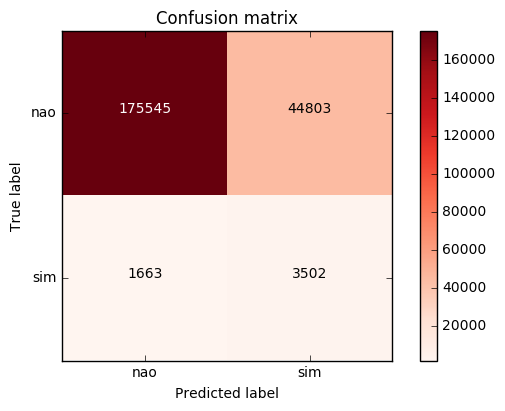

In [14]:
#Gerar a matriz de confusão para validar o modelo
cnf_matrix_tra = metrics.confusion_matrix(y_test,rf.predict(x_test))

#confusion_matrix(y_test, y_pre)

print("Recall metric in the test dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
print("Precision metric in the test dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[0,1]+cnf_matrix_tra[1,1])))

class_names = ["nao","sim"]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show() 

In [36]:
#Treinar um novo Random Forest utilizando a base inteira 
rf2 = RandomForestClassifier(n_estimators=300, 
                            max_depth=9,
                            oob_score=True, 
                            class_weight='balanced').fit(df0[Var_treino], df0['churn'])

In [29]:
df_TED = pd.read_csv('PROD_CHURN.csv', sep = ';', encoding = 'latin-1', dtype = {'CPF':str})
df_TED[['CD_CATEGORIA_PROFISSIONAL', 'CD_ESTADO_CIVIL']] = df_TED[['CD_CATEGORIA_PROFISSIONAL', 'CD_ESTADO_CIVIL']].fillna(value =-1)
df_TED[['SOMA_REST', 'VL_TOTAL_REST', 'VL_MIN_REST', 'ANOS_COM_RESTRITIVO']] = df_TED[['SOMA_REST', 'VL_TOTAL_REST', 'VL_MIN_REST', 'ANOS_COM_RESTRITIVO']].fillna(value =0)
df_TED.head()

CPF  CD_AGENCIA  CD_CONTA   Saldo_Out   Saldo_Nov  Saldo_Dez  \
0  000007770        2162      6776     4674.02     3687.86    3703.82   
1  000008488        7869     22951     1040.48     1040.62       0.00   
2  000017486        3436     35458   333372.70   334831.10  336295.88   
3  000043209        2937    148089   393139.75   378449.59  277801.84   
4  000047689        3418    115203  1311396.03  1273045.06       0.00   

   Saldo_Jan   VR_RENDA  CD_CATEGORIA_PROFISSIONAL  CD_ESTADO_CIVIL  \
0    3721.47   11500.00                        7.0              2.0   
1       0.00   10000.00                       10.0              9.0   
2  270119.56    5000.00                        7.0              2.0   
3  254926.02    8296.99                        7.0              2.0   
4       0.00  182415.47                        8.0              2.0   

        ...        Aplic_LFSUBOR  Saldo_Medio_MULTIMER  Resgate_MULTIMER  \
0       ...                    0                   0.0               0.0   
1       ...                    0                   0.0               0.0   
2       ...                    0                   0.0               0.0   
3       ...                    0                   0.0               0.0   
4       ...                    0                   0.0               0.0   

   Aplic_MULTIMER  Saldo_Medio_OUTROS  Resgate_OUTROS  Aplic_OUTROS  \
0             0.0                 0.0             0.0             0   
1             0.0                 0.0             0.0             0   
2             0.0                 0.0             0.0             0   
3             0.0                 0.0             0.0             0   
4             0.0                 0.0             0.0             0   

   Saldo_Medio_RENDA_FI  Resgate_RENDA_FI  Aplic_RENDA_FI  
0               0.00000              0.00             0.0  
1               0.00000              0.00             0.0  
2               0.00000              0.00             0.0  
3           25477.31375              0.00             0.0  
4          258444.10900        1016797.11             0.0  

[5 rows x 69 columns]

In [30]:
df_TED.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34000 entries, 0 to 33999
Data columns (total 69 columns):
CPF                          34000 non-null object
CD_AGENCIA                   34000 non-null int64
CD_CONTA                     34000 non-null int64
Saldo_Out                    34000 non-null float64
Saldo_Nov                    34000 non-null float64
Saldo_Dez                    34000 non-null float64
Saldo_Jan                    34000 non-null float64
VR_RENDA                     34000 non-null float64
CD_CATEGORIA_PROFISSIONAL    34000 non-null float64
CD_ESTADO_CIVIL              34000 non-null float64
MIN_CONTA                    34000 non-null int64
MAX_CONTA                    34000 non-null int64
TEMPO_MOV                    34000 non-null int64
QTD_CONTAS                   34000 non-null int64
FOLHA_VL_total               34000 non-null float64
TED_VL_TOTAL                 34000 non-null float64
TED_VL_m1                    34000 non-null float64
TED_VL_m2           

In [24]:
#Ler a Safra nova
df = pd.read_csv('PROD_CHURN_JAN.csv', sep = ';', encoding = 'latin-1', dtype = {'CPF':str})
df[['CD_CATEGORIA_PROFISSIONAL', 'CD_ESTADO_CIVIL']] = df[['CD_CATEGORIA_PROFISSIONAL', 'CD_ESTADO_CIVIL']].fillna(value =-1)
df[['SOMA_REST', 'VL_TOTAL_REST', 'VL_MIN_REST', 'ANOS_COM_RESTRITIVO']] = df[['SOMA_REST', 'VL_TOTAL_REST', 'VL_MIN_REST', 'ANOS_COM_RESTRITIVO']].fillna(value =0)
df.head()

CPF  CD_AGENCIA  CD_CONTA   Saldo_Out   Saldo_Nov  Saldo_Dez  \
0  00000777048        2162      6776     4674.02     3687.86    3703.82   
1  00000848832        7869     22951     1040.48     1040.62       0.00   
2  00001748661        3436     35458   333372.70   334831.10  336295.88   
3  00004320913        2937    148089   393139.75   378449.59  277801.84   
4  00004768973        3418    115203  1311396.03  1273045.06       0.00   

   Saldo_Jan   VR_RENDA  CD_CATEGORIA_PROFISSIONAL  CD_ESTADO_CIVIL  \
0    3721.47   11500.00                        7.0              2.0   
1       0.00   10000.00                       10.0              9.0   
2  270119.56    5000.00                        7.0              2.0   
3  254926.02    8296.99                        7.0              2.0   
4       0.00  182415.47                        8.0              2.0   

        ...        Aplic_LFSUBOR  Saldo_Medio_MULTIMER  Resgate_MULTIMER  \
0       ...                    0                   0.0               0.0   
1       ...                    0                   0.0               0.0   
2       ...                    0                   0.0               0.0   
3       ...                    0                   0.0               0.0   
4       ...                    0                   0.0               0.0   

   Aplic_MULTIMER  Saldo_Medio_OUTROS  Resgate_OUTROS  Aplic_OUTROS  \
0             0.0                 0.0             0.0             0   
1             0.0                 0.0             0.0             0   
2             0.0                 0.0             0.0             0   
3             0.0                 0.0             0.0             0   
4             0.0                 0.0             0.0             0   

   Saldo_Medio_RENDA_FI  Resgate_RENDA_FI  Aplic_RENDA_FI  
0               0.00000              0.00             0.0  
1               0.00000              0.00             0.0  
2               0.00000              0.00             0.0  
3           25477.31375              0.00             0.0  
4          258444.10900        1016797.11             0.0  

[5 rows x 62 columns]

In [25]:
df_model = df[(df.Saldo_Out > 2000) | (df.Saldo_Nov > 2000) | (df.Saldo_Dez > 2000) | (df.Saldo_Jan > 2000)]

In [32]:
df_model_TED = df_TED[((df_TED.Saldo_Out > 2000) | (df_TED.Saldo_Nov > 2000) | (df_TED.Saldo_Dez > 2000) | (df_TED.Saldo_Jan > 2000)) &
                     ((df_TED.TED_VL_m1 > 0) | (df_TED.TED_VL_m2 > 0) | (df_TED.TED_VL_m3 > 0) | (df_TED.TED_VL_m4 > 0))]

In [54]:
df_teste_inv = df_model_TED[(df_model_TED['probchurn']<0.5) & (df_model_TED['Saldo_Jan'] == 0)][['CPF','CD_AGENCIA', 'CD_CONTA',
                                                                                  'churn', 
                                                                                  'probchurn',
                                                                                  'Saldo_Out', 
                                                                                  'Saldo_Nov', 
                                                                                  'Saldo_Dez', 
                                                                                  'Saldo_Jan', 
                                                                                  'TED_VL_m1',
                                                                                  'TED_VL_m2',
                                                                                  'TED_VL_m3',
                                                                                  'TED_VL_m4']]

In [55]:
df_teste_inv.sort_values('Saldo_Nov', ascending = False, inplace=True)

In [56]:
df_teste = df_teste_inv[['CPF','CD_AGENCIA', 'CD_CONTA',
                          'Saldo_Out', 
                          'Saldo_Nov', 
                          'Saldo_Dez', 
                          'Saldo_Jan', 
                          'TED_VL_m1',
                          'TED_VL_m2',
                          'TED_VL_m3',
                          'TED_VL_m4']].reset_index(drop=True).head(10)

In [57]:
df_teste

CPF  CD_AGENCIA  CD_CONTA    Saldo_Out    Saldo_Nov  Saldo_Dez  \
0  347475327        3786     17666  17944494.11  17951582.90       0.00   
1  304877198        7927      5685   5298649.30   5301340.03       0.00   
2  617938927        7042      7226   4938962.04   4940390.89       0.00   
3  437321439        3475       532   4162283.69   3866109.94       0.00   
4  404774108        3635     20190   2959357.99   2997276.70       0.00   
5  133348598        3614      8282   2925288.75   2908111.97  350495.33   
6  327137758         185    256767   2539203.55   2734243.82       0.00   
7  102564409        7223       741   2614361.32   2615021.90       0.00   
8  299898177        3418      8728   2621607.03   2601705.07       0.00   
9  121285758         518    135161   2573858.65   2556397.72       0.00   

   Saldo_Jan  TED_VL_m1  TED_VL_m2  TED_VL_m3  TED_VL_m4  
0        0.0     6000.0        0.0     3000.0       0.00  
1        0.0        0.0        0.0        0.0   16244.11  
2        0.0        0.0      610.0        0.0     170.00  
3        0.0        0.0     5312.0        0.0       0.00  
4        0.0        0.0        0.0        0.0  200000.00  
5        0.0        0.0        0.0    10000.0       0.00  
6        0.0        0.0     1300.0     1600.0   41907.76  
7        0.0     2000.0        0.0        0.0       0.00  
8        0.0        0.0        0.0        0.0     700.00  
9        0.0        0.0   381000.0        0.0       0.00

In [58]:
df_teste.to_csv('Lista_CPF_sem_saldo.csv',sep=';')

In [19]:
df_model.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23428 entries, 0 to 33999
Data columns (total 62 columns):
CPF                          23428 non-null object
CD_AGENCIA                   23428 non-null int64
CD_CONTA                     23428 non-null int64
Saldo_Out                    23428 non-null float64
Saldo_Nov                    23428 non-null float64
Saldo_Dez                    23428 non-null float64
Saldo_Jan                    23428 non-null float64
VR_RENDA                     23428 non-null float64
CD_CATEGORIA_PROFISSIONAL    23428 non-null float64
CD_ESTADO_CIVIL              23428 non-null float64
MIN_CONTA                    23428 non-null int64
MAX_CONTA                    23428 non-null int64
TEMPO_MOV                    23428 non-null int64
QTD_CONTAS                   23428 non-null int64
FOLHA_VL_total               23428 non-null float64
TED_VL_TOTAL                 23428 non-null float64
TED_VL_m2                    23428 non-null float64
MEDIANA_m1          

In [26]:
df_model.head()

CPF  CD_AGENCIA  CD_CONTA   Saldo_Out   Saldo_Nov  Saldo_Dez  \
0  00000777048        2162      6776     4674.02     3687.86    3703.82   
2  00001748661        3436     35458   333372.70   334831.10  336295.88   
3  00004320913        2937    148089   393139.75   378449.59  277801.84   
4  00004768973        3418    115203  1311396.03  1273045.06       0.00   
5  00006480861          96     56855   272330.53   268048.62       0.00   

   Saldo_Jan   VR_RENDA  CD_CATEGORIA_PROFISSIONAL  CD_ESTADO_CIVIL  \
0    3721.47   11500.00                        7.0              2.0   
2  270119.56    5000.00                        7.0              2.0   
3  254926.02    8296.99                        7.0              2.0   
4       0.00  182415.47                        8.0              2.0   
5       0.00   20000.00                        6.0              2.0   

        ...        Aplic_LFSUBOR  Saldo_Medio_MULTIMER  Resgate_MULTIMER  \
0       ...                    0                   0.0               0.0   
2       ...                    0                   0.0               0.0   
3       ...                    0                   0.0               0.0   
4       ...                    0                   0.0               0.0   
5       ...                    0                   0.0               0.0   

   Aplic_MULTIMER  Saldo_Medio_OUTROS  Resgate_OUTROS  Aplic_OUTROS  \
0             0.0                 0.0             0.0             0   
2             0.0                 0.0             0.0             0   
3             0.0                 0.0             0.0             0   
4             0.0                 0.0             0.0             0   
5             0.0                 0.0             0.0             0   

   Saldo_Medio_RENDA_FI  Resgate_RENDA_FI  Aplic_RENDA_FI  
0              0.000000              0.00             0.0  
2              0.000000              0.00             0.0  
3          25477.313750              0.00             0.0  
4         258444.109000        1016797.11             0.0  
5          17098.256087            167.65          3500.0  

[5 rows x 62 columns]

In [27]:
df_model.shape

(23428, 62)

In [28]:
df.shape

(34000, 62)

In [44]:
df_model.isnull().sum().sum()

0

In [37]:
#Obter o churn e a probabilidade de churn utilizando o predict no novo modelo
df_model_TED['churn'] = rf2.predict(df_model_TED[Var_teste])

C:\Users\m190114\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [38]:
df_model_TED['probchurn'] = [x[1] for x in rf2.predict_proba(df_model_TED[Var_teste])]

C:\Users\m190114\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [47]:
df_model[['CPF', 'CD_AGENCIA', 'CD_CONTA', 'churn', 'probchurn', 'Saldo_Jan']].head(20)

CPF  CD_AGENCIA  CD_CONTA  churn  probchurn  Saldo_Jan
0   00000777048        2162      6776  False   0.260701    3721.47
2   00001748661        3436     35458  False   0.323196  270119.56
3   00004320913        2937    148089  False   0.278974  254926.02
4   00004768973        3418    115203   True   0.510528       0.00
5   00006480861          96     56855  False   0.423608       0.00
6   00011724501        3012     80812   True   0.552521       0.00
7   00012419745        7138     13280  False   0.181320  164198.52
8   00012776181        3300     26214   True   0.536228  110409.82
9   00012819760        6865      2500  False   0.198545   31707.51
11  00015155781        7047      7964  False   0.294815  349642.99
12  00016758773         480    246248  False   0.484122  442791.54
13  00017731860        7935      8961  False   0.114243  241524.81
14  00017905796        7102      6537  False   0.311026       0.00
16  00018496709        6886      6909  False   0.238389  142653.33
17  00018900852        1365    128433  False   0.162549   69027.90
19  00019037996        7283     15604  False   0.362193       0.00
20  00019473702        7640      2943  False   0.301419  750571.96
22  00024138681        1890     66299  False   0.239639  207033.75
26  00026329930        5672      2296   True   0.558894    7340.14
27  00026892863         656    425723  False   0.184718       0.00

In [66]:
df_model[(df_model['probchurn']<0.5) & (df_model['Saldo_Jan'] == 0)][['CPF', 'churn', 'probchurn','Saldo_Out', 'Saldo_Nov', 'Saldo_Dez', 'Saldo_Jan', 'Saldo_Medio_ACOES', 'Saldo_Medio_RENDA_FI', 'Saldo_Medio_CDB']]

CPF  churn  probchurn  Saldo_Out  Saldo_Nov  Saldo_Dez  \
5      00006480861  False   0.423608  272330.53  268048.62       0.00   
14     00017905796  False   0.311026  165439.61  165490.84       0.00   
19     00019037996  False   0.362193  185607.46  182094.41       0.00   
27     00026892863  False   0.184718  235250.00  235302.12       0.00   
29     00028093704  False   0.247782  162417.58  162464.57       0.00   
31     00030164800  False   0.181180  100497.56  100527.26       0.00   
33     00032268246  False   0.378002  219722.45  219285.76       0.00   
37     00036098710  False   0.319454   72058.17   38331.82       0.00   
38     00038601915  False   0.440022  107671.01   87670.90       0.00   
41     00040832708  False   0.499529  261741.57  261759.49       0.00   
44     00041951751  False   0.235969   31893.70   31902.38       0.00   
46     00045919682  False   0.275546  123992.16  124000.61       0.00   
53     00056695969  False   0.213593  121112.00  121144.99       0.00   
54     00058026878  False   0.168913  421505.85  409911.68       0.00   
62     00063581795  False   0.210575   25509.09   23285.55       0.00   
64     00063697823  False   0.159009   75851.30   76004.10       0.00   
70     00070521204  False   0.158801  206886.03  206920.03       0.00   
72     00070615870  False   0.271037    4220.90    4221.78       0.00   
84     00084303816  False   0.241863   42598.33   42783.91       0.00   
86     00086012835  False   0.156981  130150.53  130189.06       0.00   
87     00087098741  False   0.262241  594584.63  594756.62       0.00   
93     00091929725  False   0.262483  176603.74  157783.55       0.00   
112    00107730022  False   0.330050  117839.59  117689.04       0.00   
116    00109037200  False   0.215448  121494.89  121552.54       0.00   
121    00111996368  False   0.184262   13158.71   13223.00       0.00   
126    00115239642  False   0.195925    2717.55   16743.20       0.00   
139    00127439099  False   0.282333    5502.49     286.40       0.00   
144    00129446700  False   0.270208  125637.56  123670.21       0.00   
145    00130069086  False   0.410988  289730.44  289952.47   34325.51   
150    00133442691  False   0.350707  202696.91  155119.77       0.00   
...            ...    ...        ...        ...        ...        ...   
33893  98935119172  False   0.427060   63137.20   61883.26       0.00   
33896  98954733700  False   0.276712  172435.71  204387.58       0.00   
33899  98995030887  False   0.302484   46278.01       0.00       0.00   
33900  98997173804  False   0.288736    9261.07    1948.00       0.00   
33901  98998307804  False   0.264050   20426.35   20366.39       0.00   
33903  99040727872  False   0.298565  207875.23  207921.35       0.00   
33904  99057344734  False   0.209951   11579.63   11581.79       0.00   
33917  99172690704  False   0.214580    5284.22    5285.22       0.00   
33918  99180090800  False   0.295216  542620.43  542439.84       0.00   
33930  99272709687  False   0.211513  181208.54  181353.90       0.00   
33936  99346982853  False   0.173703    9276.27    9278.20       0.00   
33938  99366878091  False   0.320513  137943.49       0.00       0.00   
33944  99401266891  False   0.262901   52499.48   52512.48       0.00   
33947  99423251153  False   0.297217   25909.54       0.00       0.00   
33948  99424371853  False   0.237298  489032.11  489003.63       0.00   
33951  99472015034  False   0.480514  102406.13  102436.50       0.00   
33952  99484790844  False   0.377299  673573.71  673905.34       0.00   
33954  99503280630  False   0.226657    2248.32    2090.93       0.00   
33956  99534940615  False   0.269332  734743.37  734919.63       0.00   
33958  99537591034  False   0.205920   12840.19   12843.76       0.00   
33961  99554631120  False   0.386671       0.00   97453.55       0.00   
33966  99663090715  False   0.499313   98781.58   94692.88       0.00   
33970  99726211620  False   0.236566  177662.79  177425.64       0.00   


In [61]:
df_model[(df_model['probchurn']<0.5) & (df_model['Saldo_Jan'] == 0)].shape

(8532, 64)

In [59]:
df_model[(df_model['probchurn']>=0.5)].shape

(4586, 64)

In [60]:
df_model[(df_model['probchurn']<0.5)].shape

(18842, 64)

In [ ]:
#Salvar o arquivo final contendo somente as variáveis relevantes
df[['CPF', 'CD_AGENCIA', 'CD_CONTA', 'probchurn', 'Montante_Saldo']][df.probchurn >= 0.5].to_csv('listachurn_201812.csv', sep = ';')